In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
data_dir = 'Data'
datafile = 'Activities.csv'

run_identifiers = ["Running","Track Running","Trail Running"];

pwd = os.getcwd();
os.chdir('..')
os.chdir(data_dir);
all_activities = pd.read_csv(datafile)
os.chdir(pwd)

In [3]:
all_activities.head(20)

,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,...,Min Resp,Max Resp,Stress Change,Stress Start,Stress End,Avg Stress,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,Cycling,2022-10-23 10:45:00,False,Tippecanoe County Cycling,5.34,296,00:33:08,128,169,2.1,...,--,--,--,--,--,--,00:30:20,00:39:31,638,731
1,Running,2022-10-22 08:00:30,False,Tippecanoe County - Purdue half marathon,13.14,"1,485",01:38:55,181,190,5.0,...,--,--,--,--,--,--,01:38:51,01:38:55,606,720
2,Running,2022-10-22 07:31:03,False,Tippecanoe County Running,0.60,71,00:05:47.2,150,173,1.5,...,--,--,--,--,--,--,00:05:45.4,00:05:47.2,688,703
3,Running,2022-10-21 10:12:28,False,Tippecanoe County Running,2.52,287,00:19:57,169,184,3.1,...,--,--,--,--,--,--,00:19:56,00:19:57,706,731
4,Running,2022-10-20 09:44:59,False,Tippecanoe County Running,2.06,222,00:15:22,150,189,3.0,...,--,--,--,--,--,--,00:15:19,00:16:31,703,723
5,Indoor Rowing,2022-10-19 19:47:46,False,Indoor Rowing,"2,000",80,00:08:21.2,129,182,1.3,...,--,--,--,--,--,--,00:08:15,00:08:21.2,--,--
6,Running,2022-10-17 09:17:48,False,Tippecanoe County Running,5.05,569,00:39:29,171,184,3.9,...,--,--,--,--,--,--,00:39:27,00:39:29,674,709
7,Running,2022-10-16 16:29:01,False,Tippecanoe County Running,3.12,353,00:25:23,163,185,3.2,...,--,--,--,--,--,--,00:25:21,00:25:24,675,708
8,Running,2022-10-15 12:31:55,False,Tippecanoe County Running,8.07,988,01:10:01,173,190,4.6,...,--,--,--,--,--,--,01:09:58,01:10:06,673,713
9,Running,2022-10-13 20:10:56,False,West Lafayette Running,1.54,191,00:13:25,159,174,2.8,...,--,--,--,--,--,--,00:13:21,00:15:17,622,638


In [6]:
all_activities = all_activities.replace(',','', regex=True) #make sure no commas in numeric data
all_activities = all_activities.replace('--',None, regex=True) #convert any -- to NaN to avoid crashes

all_activities['Calories'] = all_activities['Calories'].astype(float)
all_activities['Distance'] = all_activities['Distance'].astype(float)

print('Total Activities Loaded: ' + str(all_activities.shape[0]))

runs = all_activities.loc[all_activities["Activity Type"].isin(run_identifiers)];

#handle runs not logged in Miles...but Garmin not providing Units. 
#Assume any Track Running activity needs to be converted from meters to miles.

runs.loc[all_activities["Activity Type"] == "Track Running", "Distance"] = runs.loc[all_activities["Activity Type"] == "Track Running", "Distance"]/1609.34;
print('Total Runs Loaded: ' + str(runs.shape[0]))

runs.head(20)
#TODO
# - Need to 


Total Activities Loaded: 1320
Total Runs Loaded: 899


,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,...,Min Resp,Max Resp,Stress Change,Stress Start,Stress End,Avg Stress,Moving Time,Elapsed Time,Min Elevation,Max Elevation
1,Running,2022-10-22 08:00:30,False,Tippecanoe County - Purdue half marathon,13.140000,1485.0,01:38:55,181,190,5.0,...,None,None,None,None,None,None,01:38:51,01:38:55,606,720
2,Running,2022-10-22 07:31:03,False,Tippecanoe County Running,0.600000,71.0,00:05:47.2,150,173,1.5,...,None,None,None,None,None,None,00:05:45.4,00:05:47.2,688,703
3,Running,2022-10-21 10:12:28,False,Tippecanoe County Running,2.520000,287.0,00:19:57,169,184,3.1,...,None,None,None,None,None,None,00:19:56,00:19:57,706,731
4,Running,2022-10-20 09:44:59,False,Tippecanoe County Running,2.060000,222.0,00:15:22,150,189,3.0,...,None,None,None,None,None,None,00:15:19,00:16:31,703,723
6,Running,2022-10-17 09:17:48,False,Tippecanoe County Running,5.050000,569.0,00:39:29,171,184,3.9,...,None,None,None,None,None,None,00:39:27,00:39:29,674,709
7,Running,2022-10-16 16:29:01,False,Tippecanoe County Running,3.120000,353.0,00:25:23,163,185,3.2,...,None,None,None,None,None,None,00:25:21,00:25:24,675,708
8,Running,2022-10-15 12:31:55,False,Tippecanoe County Running,8.070000,988.0,01:10:01,173,190,4.6,...,None,None,None,None,None,None,01:09:58,01:10:06,673,713
9,Running,2022-10-13 20:10:56,False,West Lafayette Running,1.540000,191.0,00:13:25,159,174,2.8,...,None,None,None,None,None,None,00:13:21,00:15:17,622,638
10,Track Running,2022-10-13 19:37:36,False,West Lafayette - 6x800m 2 min rest,3.342985,388.0,00:28:45,155,197,3.4,...,None,None,None,None,None,None,00:27:30,00:28:45,625,630
11,Running,2022-10-13 19:31:32,False,West Lafayette Running,0.510000,59.0,00:04:20.4,124,145,1.5,...,None,None,None,None,None,None,00:04:19,00:04:20.4,626,634


<IPython.core.display.Javascript object>


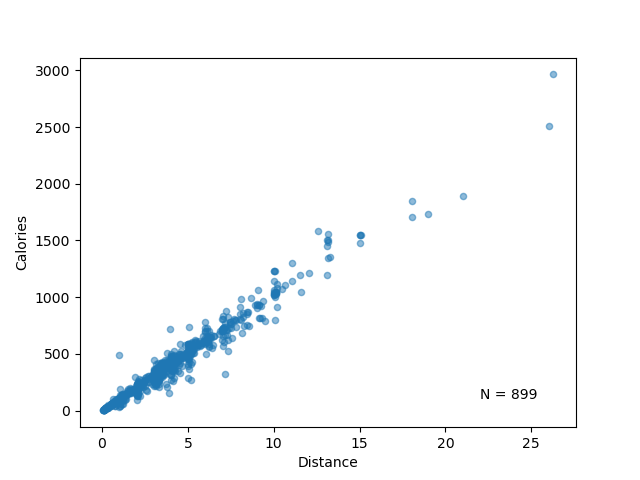

Text(22, 100, 'N = 899')

In [10]:
%matplotlib notebook

runs.plot.scatter(x = "Distance", y = "Calories", alpha = .5)
plt.text(x=22, y=100, s="N = " + str(runs.shape[0])) #hardcoded can fix this later